# Airbnb NYC-2019 Dataset
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Data Loading

In [2]:
airbnb=pd.read_csv('C:/Users/Administrator/Downloads/airbnb/nyc_airbnb2019.csv')

In [3]:
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [6]:
airbnb.shape

(48895, 16)

## Data Cleaning

In [7]:
for column in airbnb.columns:
    if airbnb[column].isnull().sum() != 0:
        print(f"{column} -{airbnb[column].isnull().sum()} missing values")
   

name -16 missing values
host_name -21 missing values
last_review -10052 missing values
reviews_per_month -10052 missing values


In [8]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
airbnb.drop(["name","host_name","last_review"], axis="columns", inplace=True)

In [10]:
airbnb.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [11]:
airbnb["reviews_per_month"].mean()


1.3732214298586884

In [12]:
airbnb['reviews_per_month'].fillna(value=round(airbnb['reviews_per_month'].mean(),2), inplace=True)

In [13]:
airbnb.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               1.37                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [14]:
airbnb.nunique(axis=0)

id                                48895
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [15]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
for column in airbnb.columns:
    if len(airbnb[column].unique()) < 10:
        print(f"{column} - {airbnb[column].unique()}")

neighbourhood_group - ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type - ['Private room' 'Entire home/apt' 'Shared room']


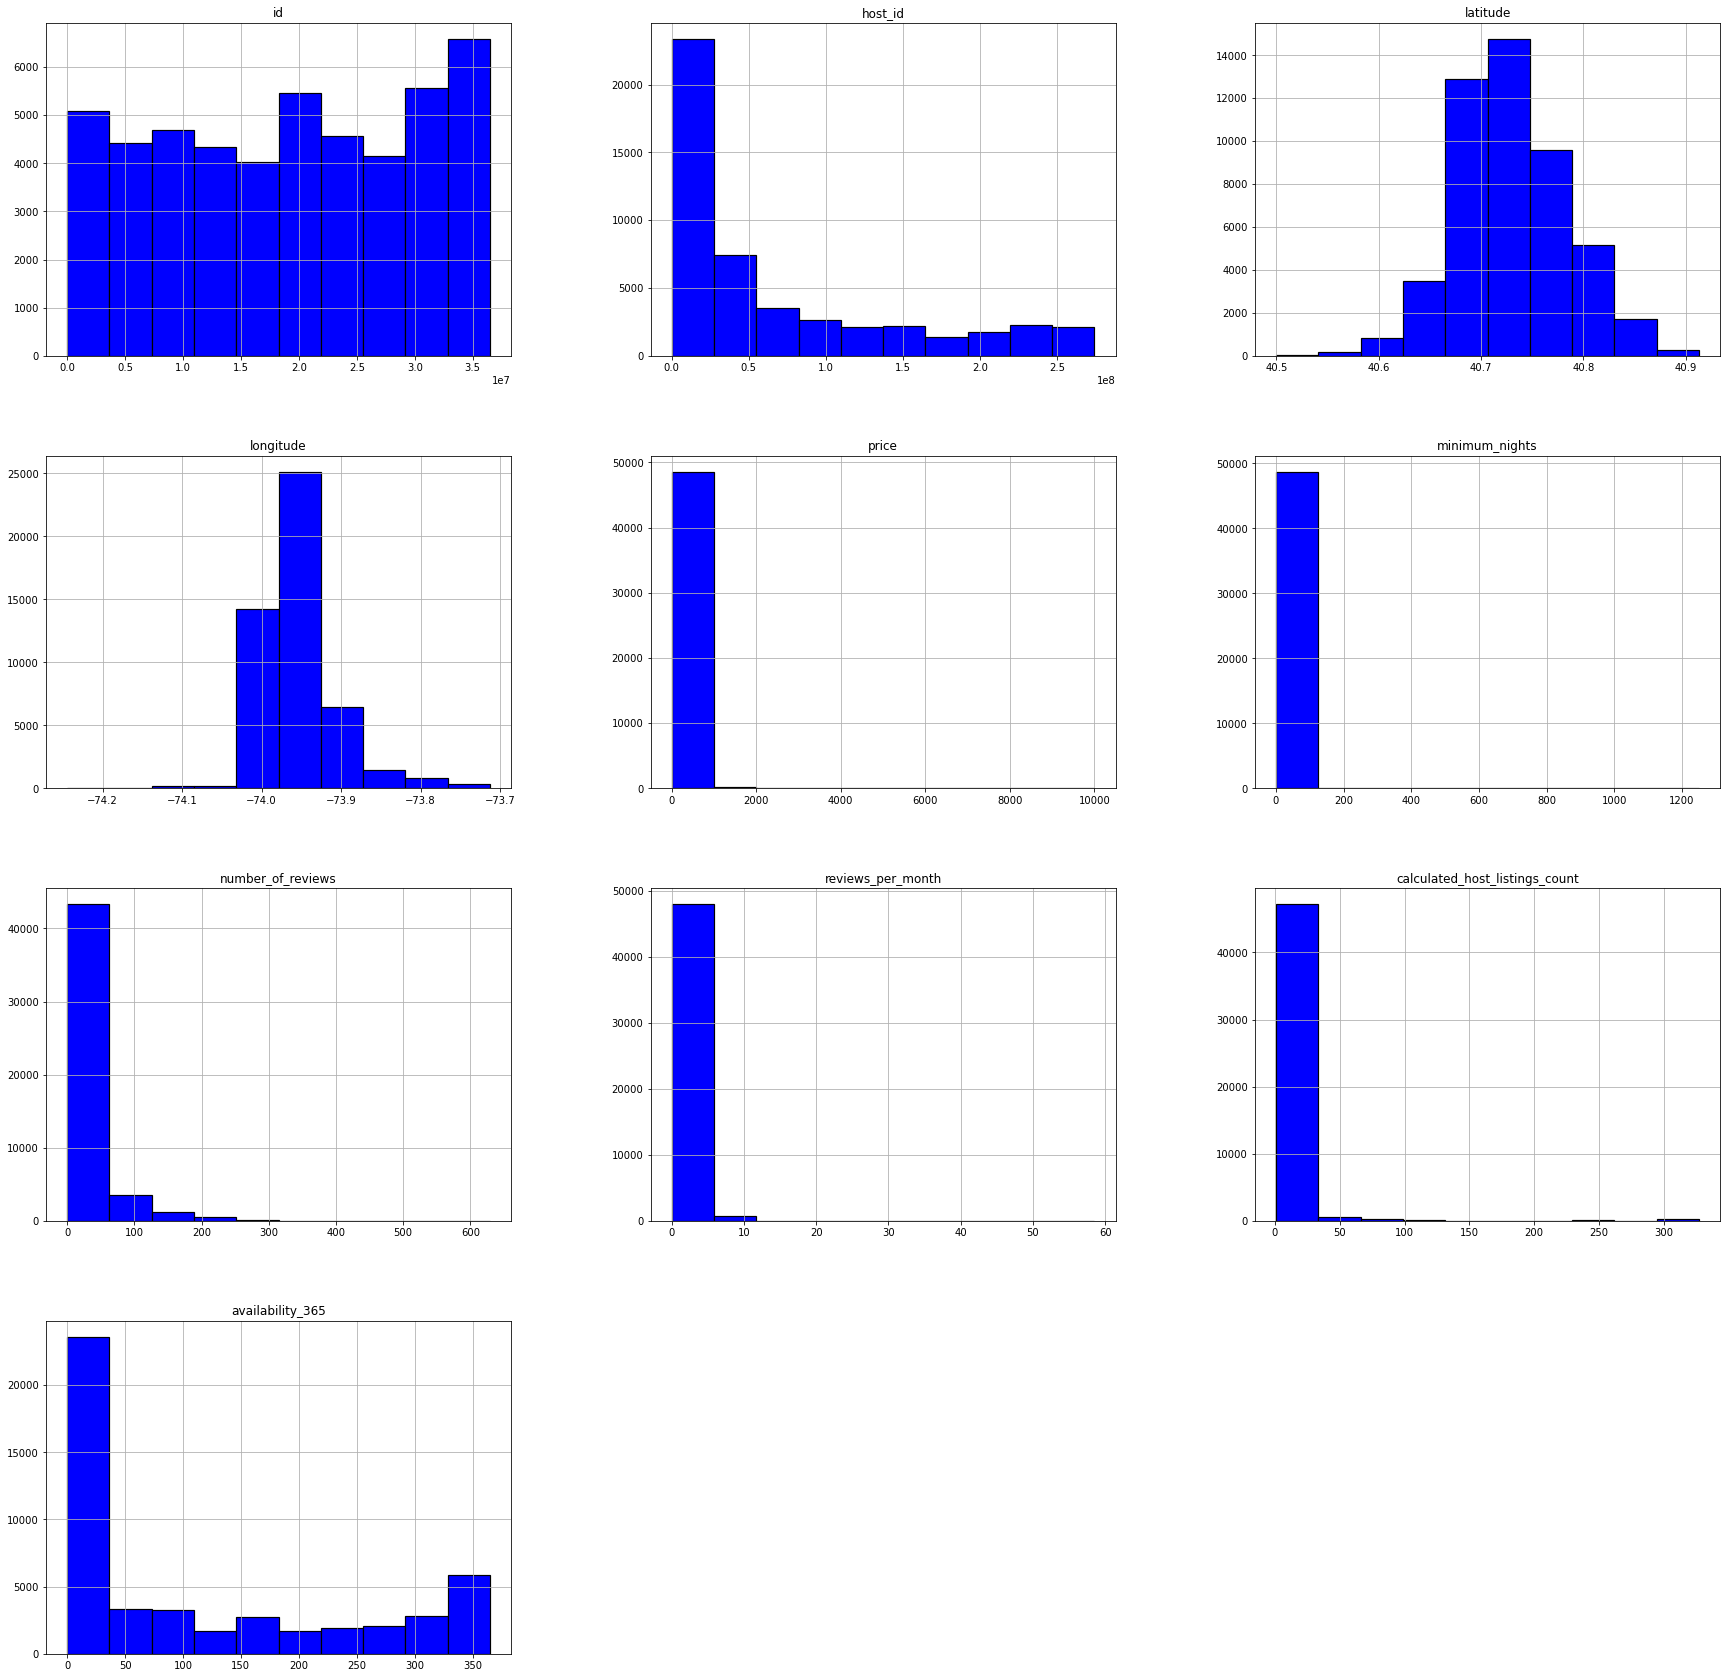

In [17]:
airbnb.hist(color='blue',edgecolor="black", linewidth=1.2, figsize=(30, 30));

In [18]:
airbnb.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Text(0.5, 1.0, 'minimum nights')

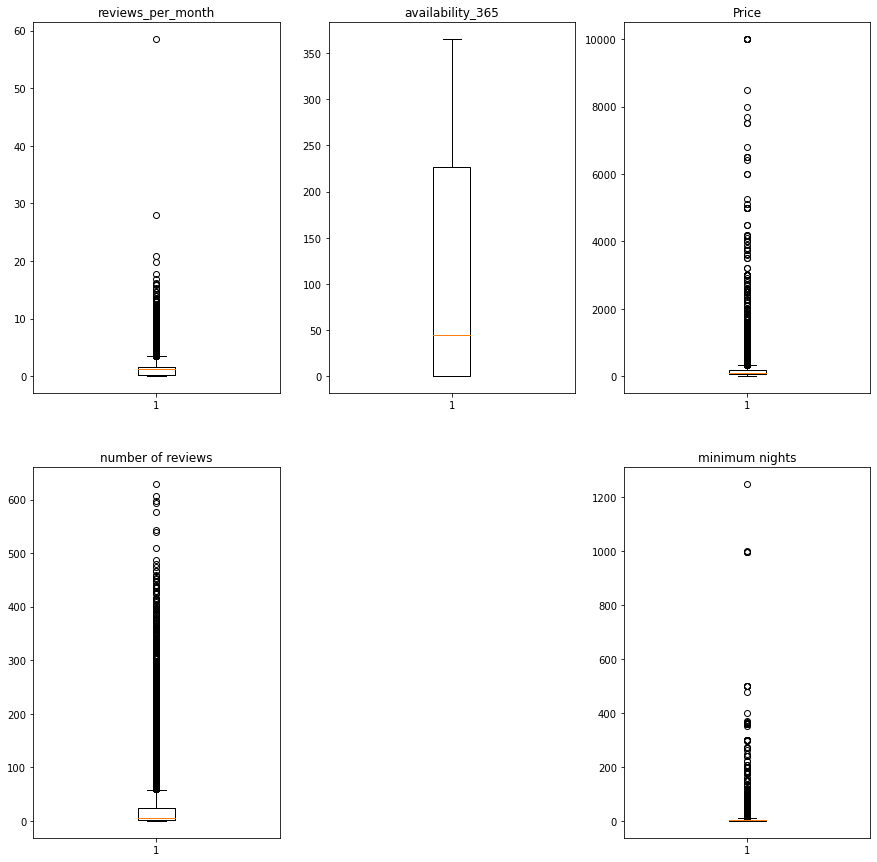

In [19]:
plt.figure(figsize = (15, 15))
ax=plt.subplot(231)
plt.boxplot(airbnb['reviews_per_month'])
ax.set_title('reviews_per_month')
ax=plt.subplot(232)
plt.boxplot(airbnb['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(233)
plt.boxplot(airbnb['price'])
ax.set_title('Price')
ax=plt.subplot(234)
plt.boxplot(airbnb['number_of_reviews'])
ax.set_title('number of reviews')
ax=plt.subplot(236)
plt.boxplot(airbnb['minimum_nights'])
ax.set_title('minimum nights')

The columns have outliers which should be removed 

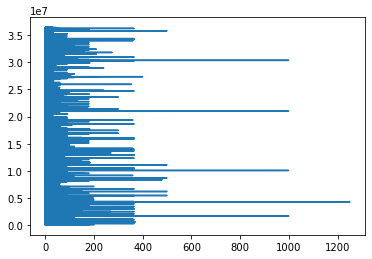

In [20]:
plt.plot(airbnb["minimum_nights"],airbnb["id"])

In [21]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<Figure size 2160x2160 with 0 Axes>

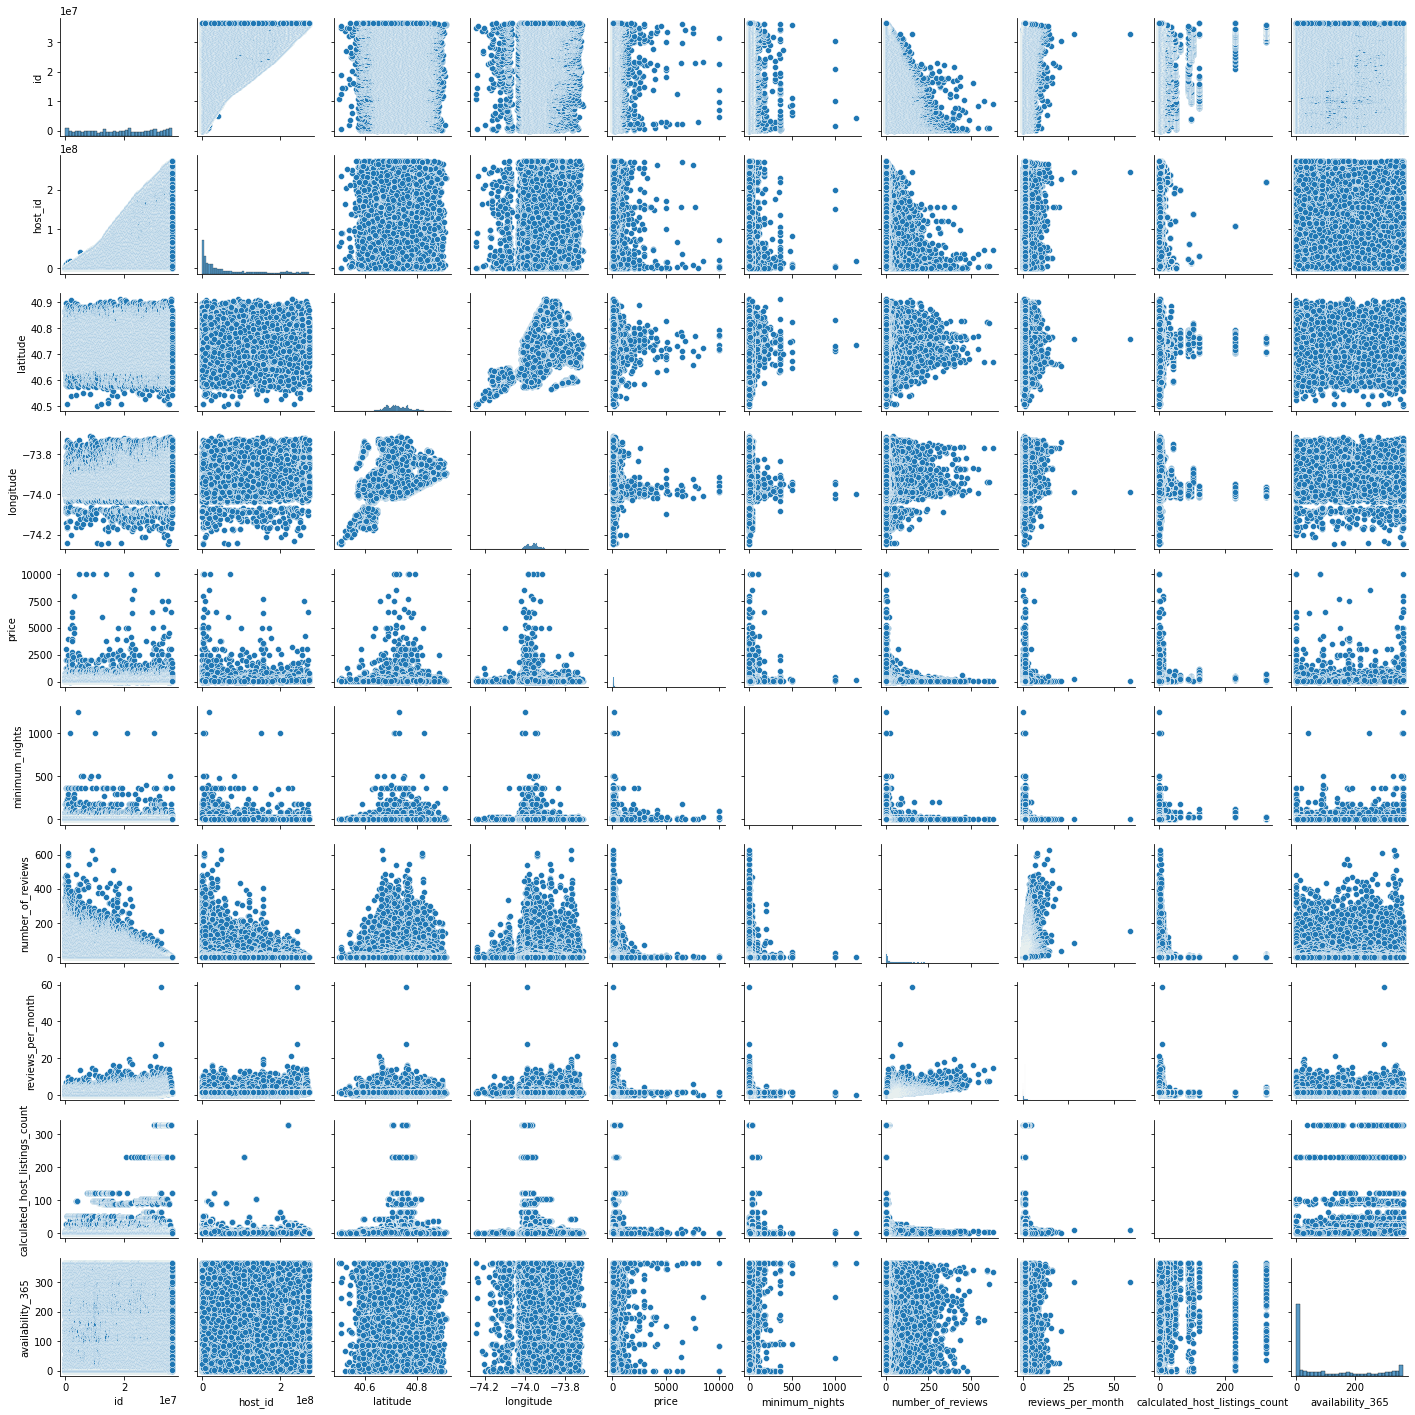

In [22]:
plt.figure(figsize=(30, 30))
sns.pairplot(airbnb, height=2, diag_kind="hist")

In [23]:
#IQR for price
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1    
filter = (airbnb['price'] >= Q1 - 1.5 * IQR) & (airbnb['price'] <= Q3 + 1.5 *IQR)
airbnb_price=airbnb.loc[filter]

In [24]:
#IQR for reviews per month
Q1 = airbnb['reviews_per_month'].quantile(0.25)
Q3 = airbnb['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1  
filter = (airbnb['reviews_per_month'] >= Q1 - 1.5 * IQR) & (airbnb['reviews_per_month'] <= Q3 + 1.5 *IQR)
airbnb_rpm=airbnb_price.loc[filter]

In [25]:
#IQR for Number of Reviews
Q1 = airbnb['number_of_reviews'].quantile(0.25)
Q3 = airbnb['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1  
filter = (airbnb['number_of_reviews'] >= Q1 - 1.5 * IQR) & (airbnb['number_of_reviews'] <= Q3 + 1.5 *IQR)
airbnb_nr=airbnb_rpm.loc[filter]

In [26]:
#IQR for minimum nights
Q1 = airbnb['minimum_nights'].quantile(0.25)
Q3 = airbnb['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1  
filter = (airbnb['minimum_nights'] >= Q1 - 1.5 * IQR) & (airbnb['minimum_nights'] <= Q3 + 1.5 *IQR)
airbnb_nyc=airbnb_nr.loc[filter]

Removing the outliers using IQR method

Text(0.5, 1.0, 'minimum nights')

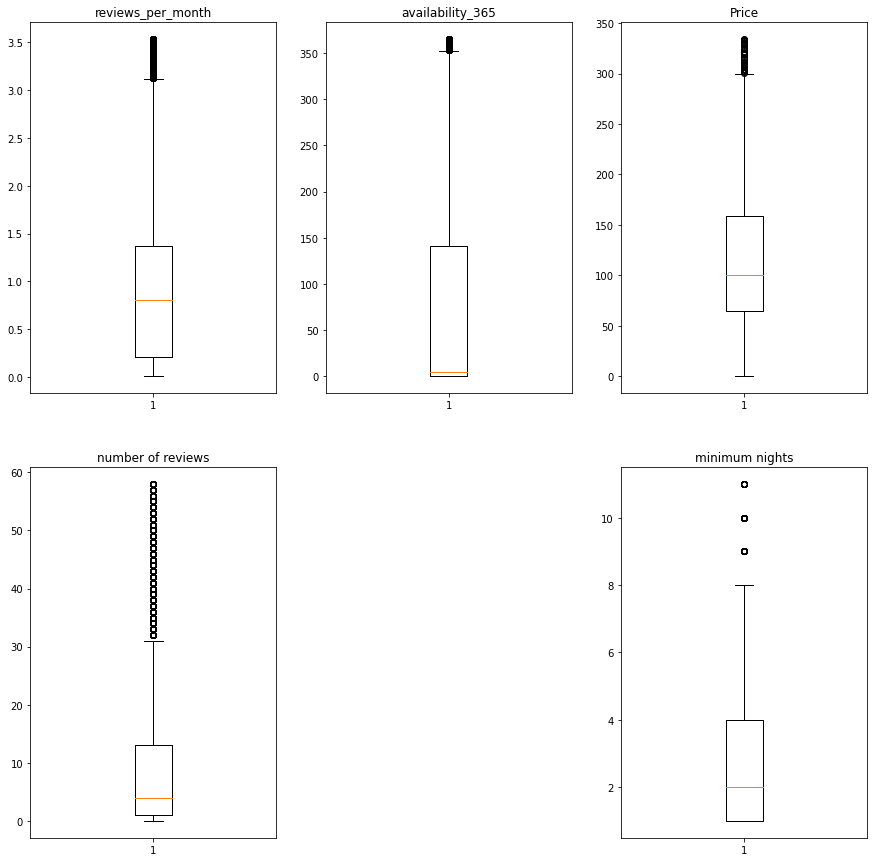

In [27]:
#Box plot after removing the outliers using IQR method-Reviews Per month, Availability 365, Price,Number of reviews, Minimum Nights
plt.figure(figsize = (15, 15))
ax=plt.subplot(231)
plt.boxplot(airbnb_nyc['reviews_per_month'])
ax.set_title('reviews_per_month')
ax=plt.subplot(232)
plt.boxplot(airbnb_nyc['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(233)
plt.boxplot(airbnb_nyc['price'])
ax.set_title('Price')
ax=plt.subplot(234)
plt.boxplot(airbnb_nyc['number_of_reviews'])
ax.set_title('number of reviews')
ax=plt.subplot(236)
plt.boxplot(airbnb_nyc['minimum_nights'])
ax.set_title('minimum nights')

<Figure size 2160x2160 with 0 Axes>

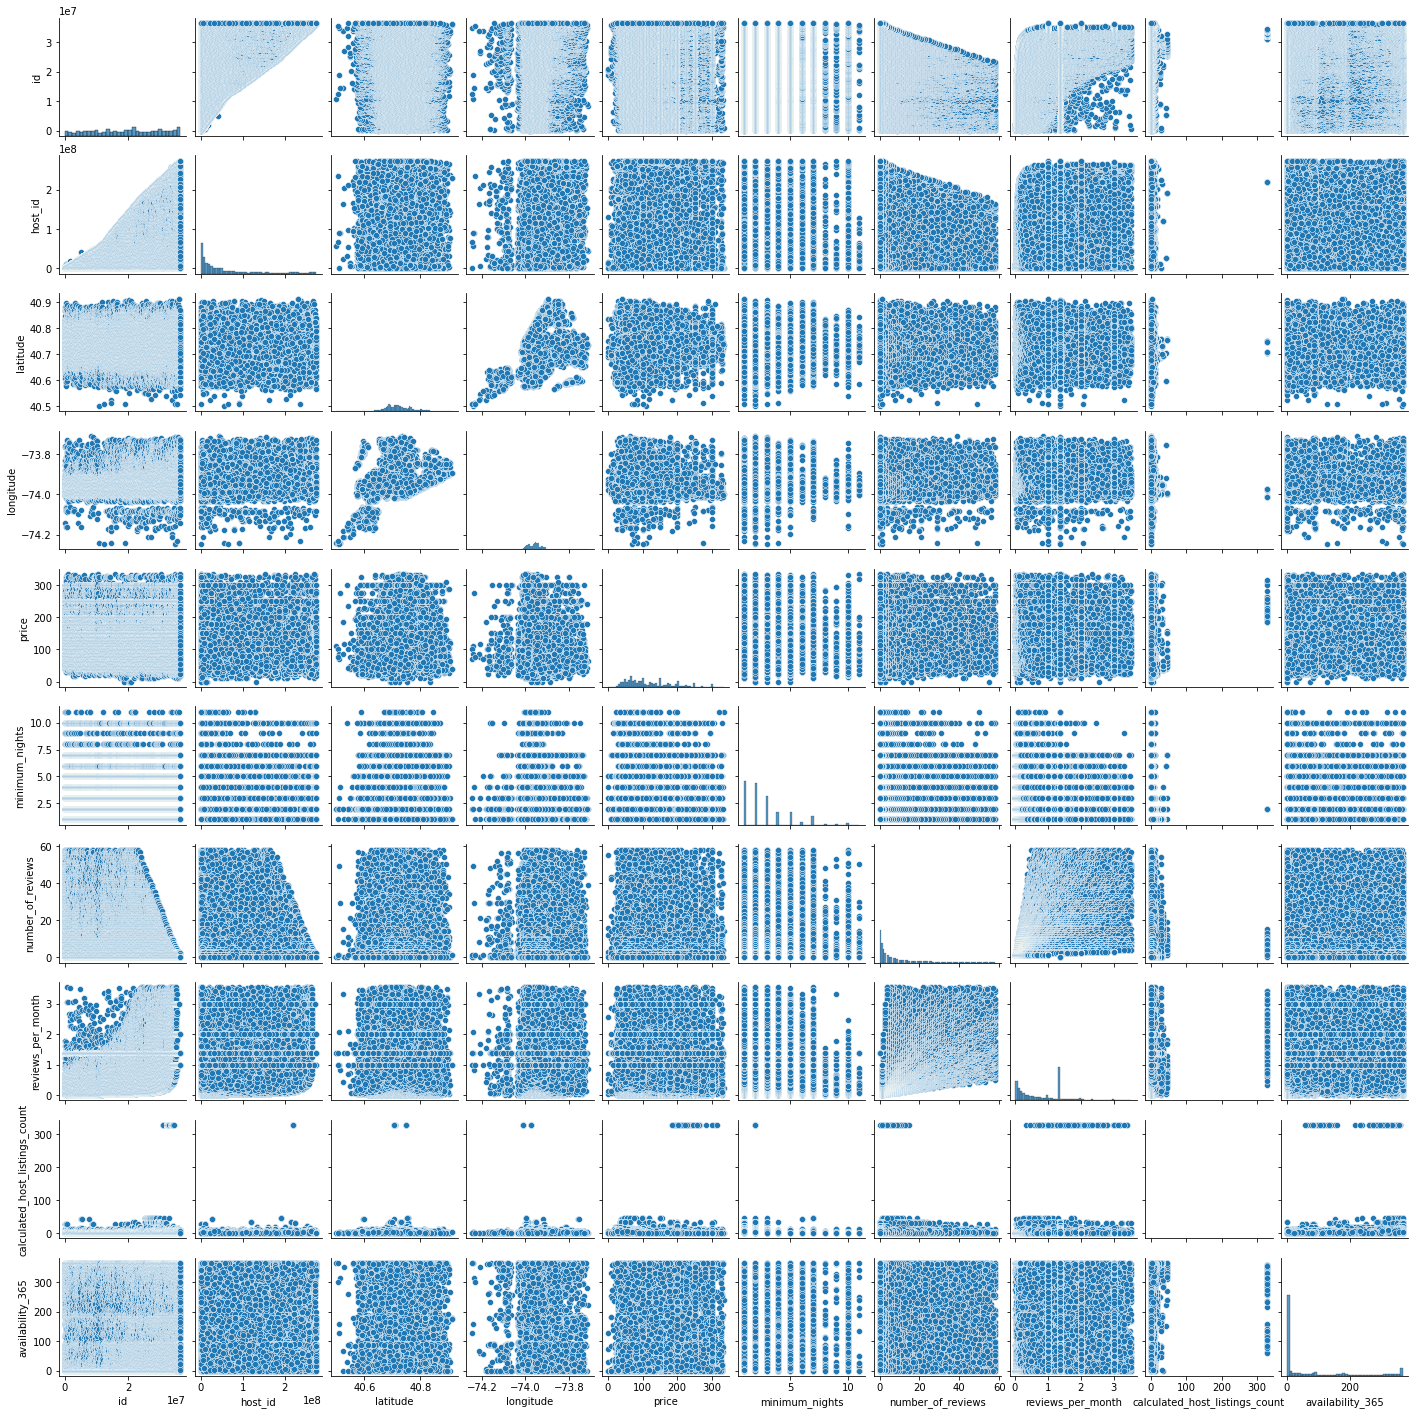

In [28]:
plt.figure(figsize=(30, 30))
sns.pairplot(airbnb_nyc, height=2, diag_kind="hist")

In [29]:
airbnb_nyc['availability_365'].value_counts()

0      15184
365      692
1        289
89       272
5        268
       ...  
218        9
200        9
186        8
240        8
202        5
Name: availability_365, Length: 366, dtype: int64

In [30]:
airbnb_nyc['neighbourhood_group'].value_counts()

Brooklyn         14127
Manhattan        13136
Queens            3808
Bronx              780
Staten Island      255
Name: neighbourhood_group, dtype: int64

## Pearson Correlation

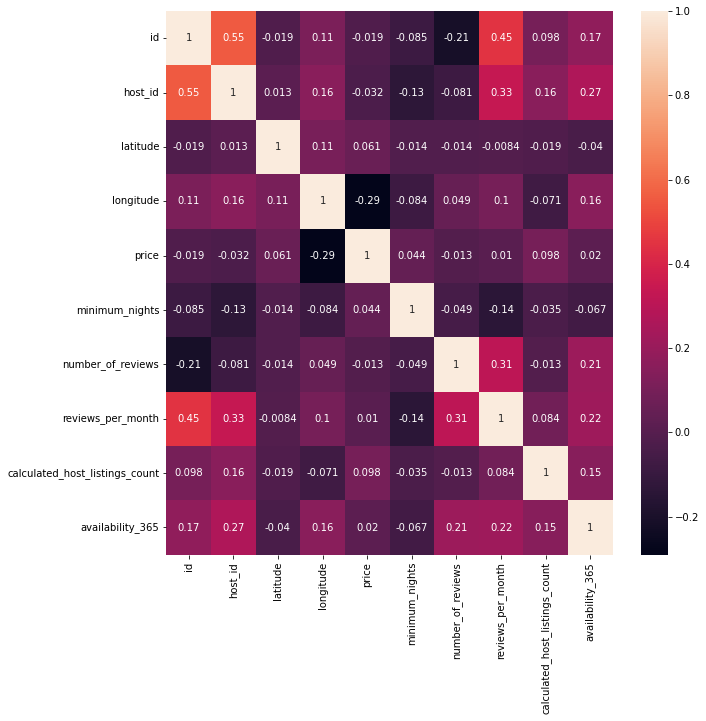

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(airbnb_nyc.corr(method='pearson'), annot=True)
plt.show()

In [32]:
pearson_coeff, pvalue=stats.pearsonr(airbnb_nyc['reviews_per_month'],airbnb_nyc['number_of_reviews'])
print("Pearson coeff", pearson_coeff, "with p-value of p=", pvalue)

Pearson coeff 0.31190103982403583 with p-value of p= 0.0


In [33]:
airbnb_nyc.head()

id  host_id neighbourhood_group    neighbourhood  latitude  longitude  \
0   2539     2787            Brooklyn       Kensington  40.64749  -73.97237   
1   2595     2845           Manhattan          Midtown  40.75362  -73.98377   
2   3647     4632           Manhattan           Harlem  40.80902  -73.94190   
4   5022     7192           Manhattan      East Harlem  40.79851  -73.94399   
10  5295     7702           Manhattan  Upper West Side  40.80316  -73.96545   

          room_type  price  minimum_nights  number_of_reviews  \
0      Private room    149               1                  9   
1   Entire home/apt    225               1                 45   
2      Private room    150               3                  0   
4   Entire home/apt     80              10                  9   
10  Entire home/apt    135               5                 53   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.21                               6               365  
1                0.38                               2               355  
2                1.37                               1               365  
4                0.10                               1                 0  
10               0.43                               1                 6

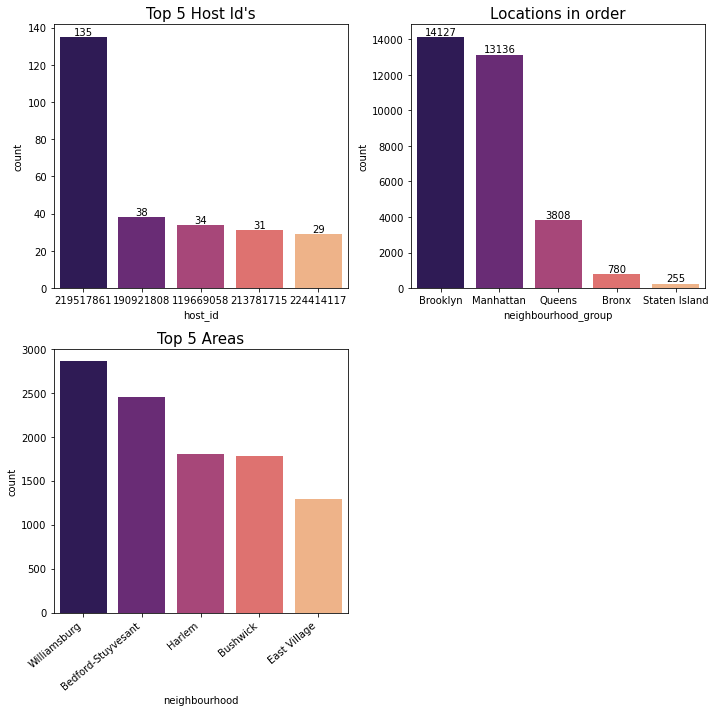

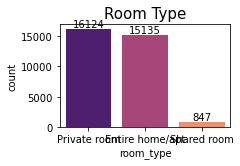

In [34]:
plt.figure(figsize = (15, 15))
#Top 5 hosts
plt.subplot(221)
ax=sns.countplot(x="host_id", data=airbnb_nyc, palette="magma",
              order=airbnb_nyc.host_id.value_counts().iloc[:5].index)
ax.set_title("Top 5 Host Id's", fontsize = 15)
ax.bar_label(ax.containers[0])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.tight_layout()
plt.show


#Neighbourhood group
plt.subplot(222)
ax=sns.countplot(x="neighbourhood_group",data=airbnb_nyc, palette="magma",
                 order=airbnb_nyc.neighbourhood_group.value_counts().index)

ax.bar_label(ax.containers[0])
fig = plt.gcf()
ax.set_title("Locations in order", fontsize = 15)
fig.set_size_inches(10,10)



#Top 5 Neighbourhood
plt.subplot(223)
ax=sns.countplot(x="neighbourhood", data=airbnb_nyc, palette="magma",
              order=airbnb_nyc.neighbourhood.value_counts().iloc[:5].index)
ax.set_title("Top 5 Areas", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.tight_layout()
plt.show()



#Room type
plt.subplot(224)
ax=sns.countplot(x="room_type", data=airbnb_nyc, palette="magma",
              order=airbnb_nyc.room_type.value_counts().index)
ax.set_title("Room Type", fontsize = 15)
ax.bar_label(ax.containers[0])
fig.set_size_inches(20,20)
fig=plt.gcf()
plt.tight_layout()
plt.show(block=False)



Text(0.5, 1.0, 'Number of Days Available for Booking')

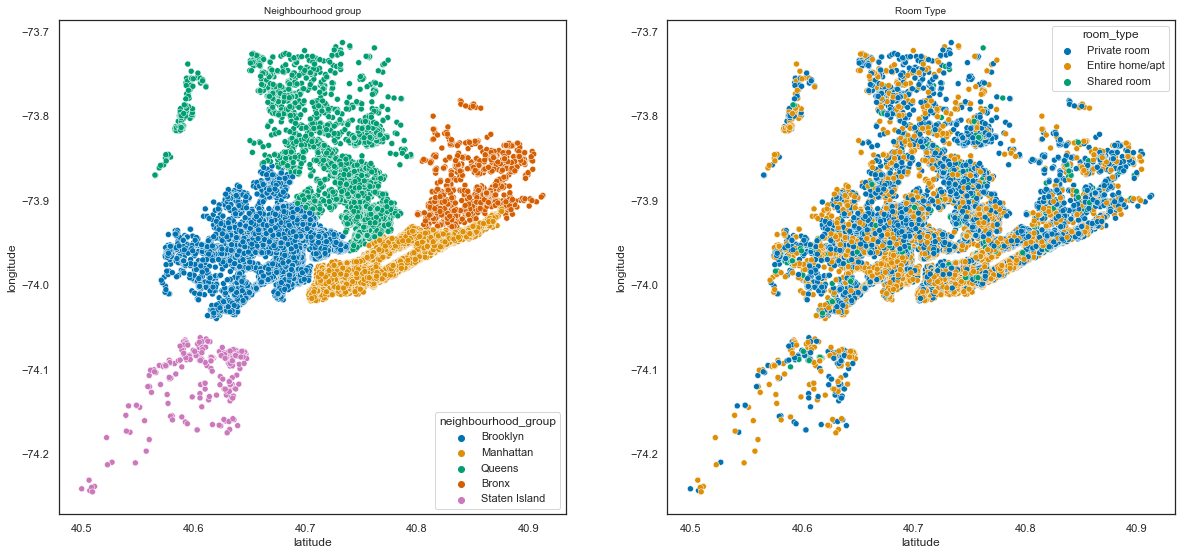

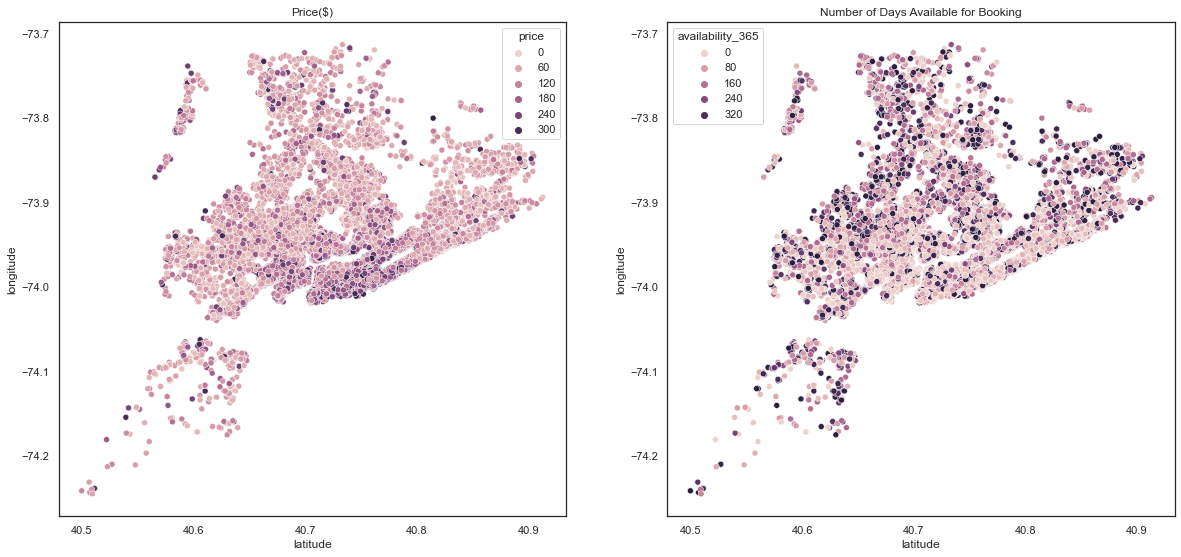

In [35]:
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
sns.set_theme(style="white", palette='colorblind')
plt.figure(figsize = (20, 20))
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=airbnb_nyc)
plt.title("Neighbourhood group", fontsize=10)

plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=airbnb_nyc)
plt.title("Room Type", fontsize=10)


plt.figure(figsize = (20, 20))
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=airbnb_nyc)
plt.title("Price($)")


plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=airbnb_nyc)
plt.title("Number of Days Available for Booking")

In [36]:
sns.set_palette("viridis") 
# Use palplot and pass in the variable:
sns.set_style('whitegrid')
# Violin plot


[Text(0.5, 1.0, 'Distribution of Room Type & Price')]

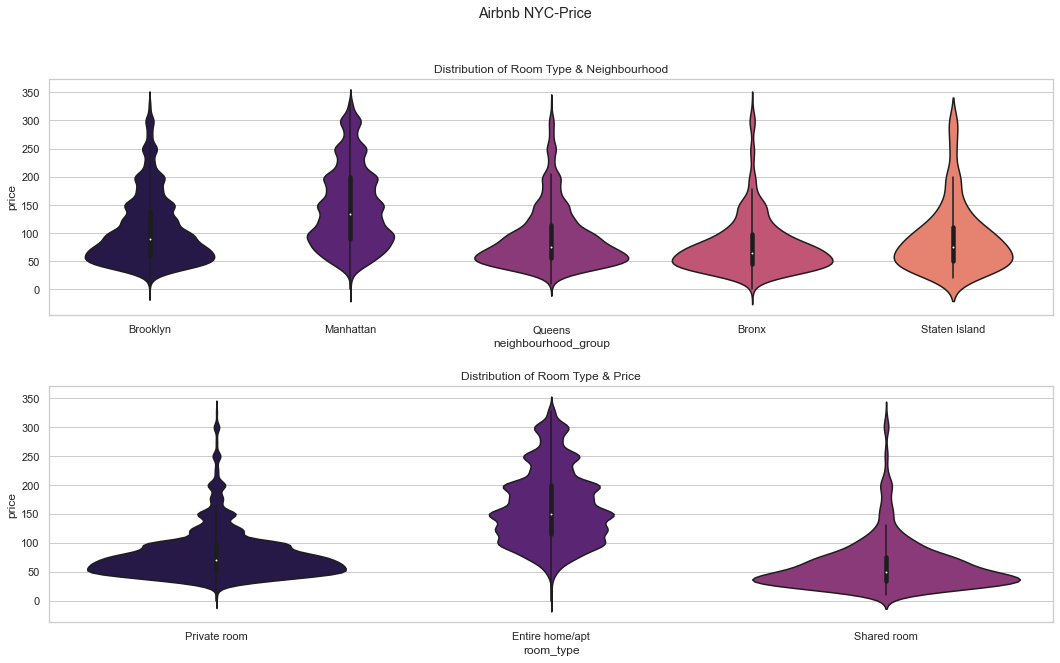

In [37]:
fig, axes = plt.subplots(2,  figsize=(18, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Airbnb NYC-Price')
sns.set_palette('magma') 
# Use palplot and pass in the variable:
sns.set_style('whitegrid')
# Violin plot
sns.violinplot(ax=axes[0],x='neighbourhood_group', y='price', data=airbnb_nyc).set(title='Distribution of Room Type & Neighbourhood')
sns.violinplot(ax=axes[1],x='room_type', y='price', data=airbnb_nyc).set(title='Distribution of Room Type & Price')

[Text(0.5, 1.0, 'Days Listing Available For Booking')]

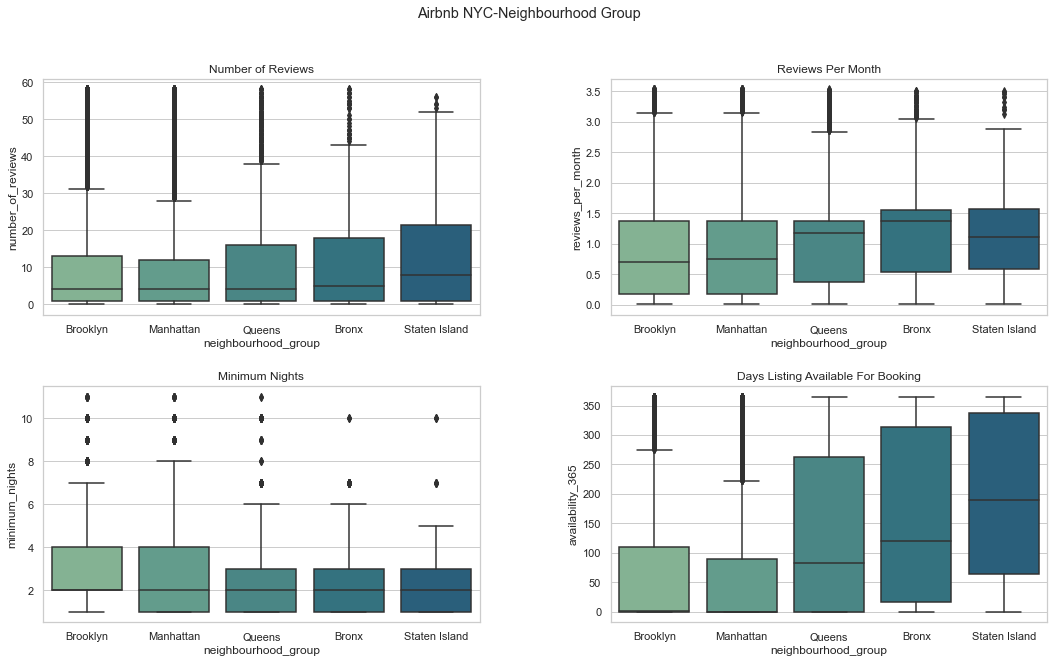

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Airbnb NYC-Neighbourhood Group')
sns.set_palette('crest') 
sns.boxplot(ax=axes[0, 0], data=airbnb_nyc, x='neighbourhood_group', y='number_of_reviews').set(title="Number of Reviews")
sns.boxplot(ax=axes[0, 1], data=airbnb_nyc, x='neighbourhood_group', y='reviews_per_month').set(title="Reviews Per Month")
sns.boxplot(ax=axes[1, 0], data=airbnb_nyc, x='neighbourhood_group', y='minimum_nights').set(title="Minimum Nights")
sns.boxplot(ax=axes[1, 1], data=airbnb_nyc, x='neighbourhood_group', y='availability_365').set(title="Days Listing Available For Booking")


In [39]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

<AxesSubplot:xlabel='room_type', ylabel='availability_365'>

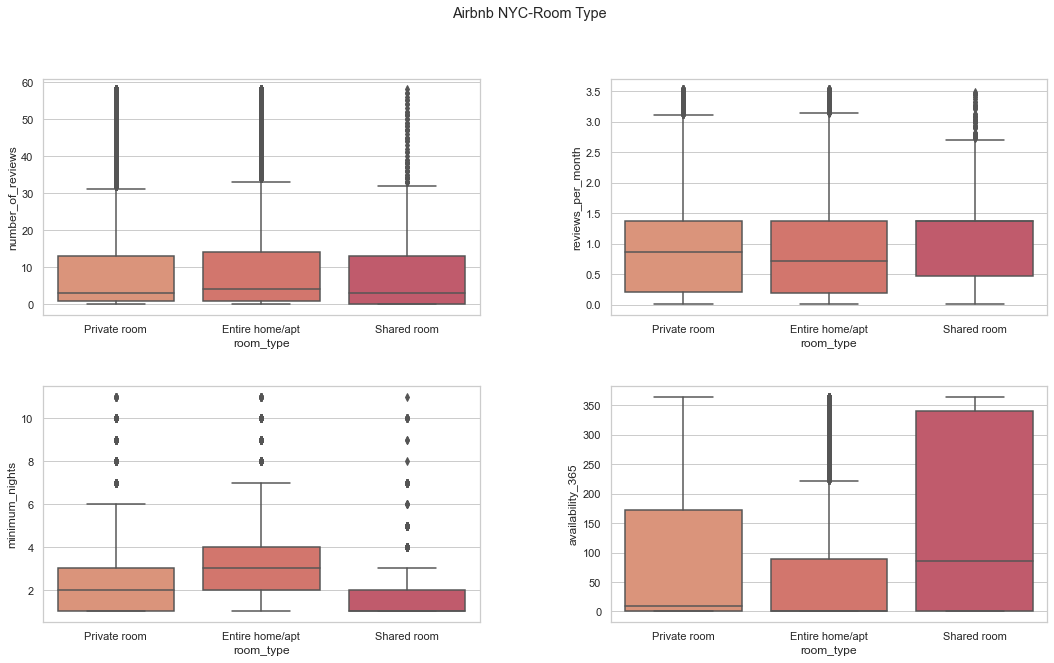

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Airbnb NYC-Room Type')
sns.set_palette('flare') 
sns.boxplot(ax=axes[0, 0], data=airbnb_nyc, x='room_type', y='number_of_reviews')
sns.boxplot(ax=axes[0, 1], data=airbnb_nyc, x='room_type', y='reviews_per_month')
sns.boxplot(ax=axes[1, 0], data=airbnb_nyc, x='room_type', y='minimum_nights')
sns.boxplot(ax=axes[1, 1], data=airbnb_nyc, x='room_type', y='availability_365')

In [41]:
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

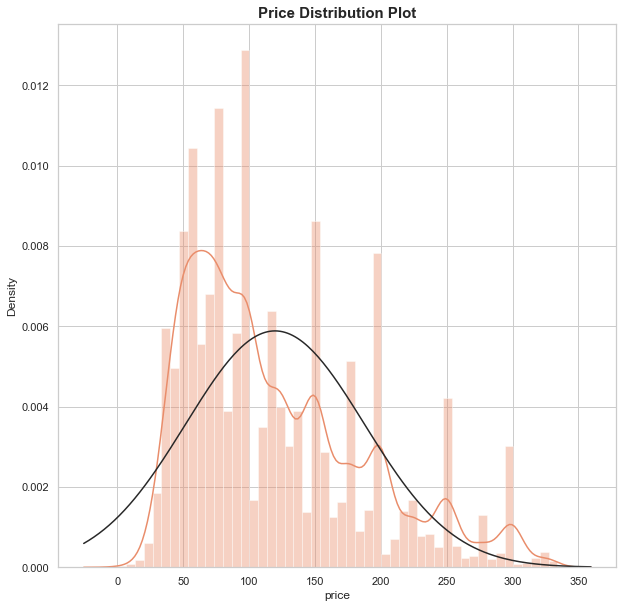

In [42]:
plt.figure(figsize=(10,10))
sns.distplot(airbnb_nyc['price'], fit=stats.norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [43]:
airbnb_nyc.to_csv("C:/Users/Administrator/OneDrive/Documents/Airbnb/airbnb_nyc.csv")

In [44]:
from scipy import stats

In [45]:
pearson_coeff,p_value=stats.pearsonr(airbnb_nyc['number_of_reviews'],airbnb_nyc['reviews_per_month'])
print("The Pearson Coor", pearson_coeff,"p-value",p_value)


The Pearson Coor 0.31190103982403583 p-value 0.0


In [46]:
pearson_coeff,p_value=stats.pearsonr(airbnb_nyc['availability_365'],airbnb_nyc['reviews_per_month'])
print("The Pearson Coor", pearson_coeff,"p-value",p_value)


The Pearson Coor 0.2156443304204757 p-value 0.0
